In [1]:
## RUN SUMMARY STATISTICS FOR A DATASET (TASK 1)
# Updated on 2020_11_03

In [2]:
# IMPORT PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
sns.set_style("darkgrid")

In [3]:
# IMPORT DATA TASK 1 (HUMAN)
temp1 = pd.read_csv('../Output/Task1_step4.csv')
db = temp1
temp1.head()

,participant_ID,treatment,part,trial_no,rounds,red_prior_prob,current_rounds,action_type,suspect,count_red_samples,count_blue_samples,evidence_found,evidence_suspect,posterior,true_guilty_suspect,suspect_accused,time
0,1.0,1.0,1.0,1.0,1.0,0.5,1,0,0.0,0,0,0,-1.0,0.500000,0.0,0.0,4654.1816
1,1.0,1.0,1.0,1.0,1.0,0.5,2,1,0.0,1,0,0,-1.0,0.428571,0.0,0.0,13857.2739
2,1.0,1.0,1.0,2.0,3.0,0.1,1,0,1.0,0,0,0,-1.0,0.100000,1.0,1.0,3317.6681
3,1.0,1.0,1.0,2.0,3.0,0.1,2,0,1.0,0,1,0,-1.0,0.129032,1.0,1.0,5101.5863
4,1.0,1.0,1.0,2.0,3.0,0.1,3,0,1.0,0,2,0,-1.0,0.164948,1.0,1.0,6735.5187


In [4]:
## CHECK THE FINAL BELIEFS ##

In [5]:
# CREATE VECTOR OF "final beliefs" (only when the action is "accuse")
fin = []
for key,value in temp1.iterrows():
    if value[7] == 1.0:
        fin.append(temp1['posterior'][key])

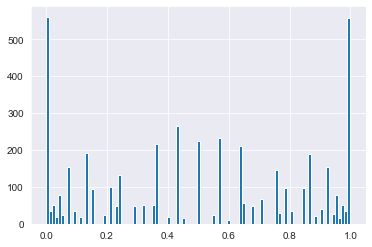

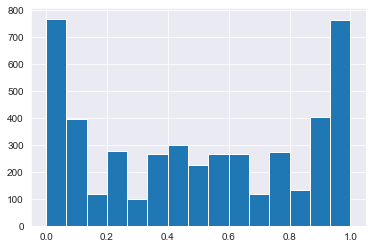

In [6]:
# PLOT FINAL BELIEFS
plt.hist(fin, bins=101)
plt.show()
plt.hist(fin, bins=15)
plt.show()

In [7]:
##################################################

LIST OF CONDITIONS

In [8]:
vector_prior   = [0.1, 0.3, 0.5, 0.7, 0.9]
vector_samples = [1, 3, 5, 7, 9]

table_condition=[];
for i_prior in vector_prior:
    for i_samples in vector_samples:
        table_condition.append([i_prior, i_samples])

n_conditions = len(table_condition)

table_condition

[[0.1, 1],
 [0.1, 3],
 [0.1, 5],
 [0.1, 7],
 [0.1, 9],
 [0.3, 1],
 [0.3, 3],
 [0.3, 5],
 [0.3, 7],
 [0.3, 9],
 [0.5, 1],
 [0.5, 3],
 [0.5, 5],
 [0.5, 7],
 [0.5, 9],
 [0.7, 1],
 [0.7, 3],
 [0.7, 5],
 [0.7, 7],
 [0.7, 9],
 [0.9, 1],
 [0.9, 3],
 [0.9, 5],
 [0.9, 7],
 [0.9, 9]]

In [9]:
## CALCULATE SUMMARY STATISITCS ##

LIST OF DESIRED VARIABLES OF INTEREST

Summary statistics (aggregate and for each condition)
1. Percentage correct answer
2. Percentage evidence found
3. Percentage confirmatory in round 1
4. Percentage confirmatory overall (defined wrt the prior)

Searching behavior
1. Percentage confirmatory search as a function of round (x-axis) and condition (lines: low/high prior, n_days)

Action behavior
1. Proability of accusing red as a function of the true posterior probability
2. Separate based on the initial prior
3. Separate based on the number of samples


In [10]:
# create a matrix
test = [[1,2], [3,4]]
print(np.matrix(test))

[[1 2]
 [3 4]]


In [11]:
##################################################

In [12]:
summary_statistic = [];
confirmatory_round = [];
number_observations =[];
x_round = [];
 
for i_condition in range(25):

    i_prior   = table_condition[i_condition][0]
    i_samples = table_condition[i_condition][1]
    
    ##### SUMMARY STATISTICS
    
    # select trials based on the condition, separate accuse and investigate
    temp      = db.loc[(db['red_prior_prob']==i_prior) & (db['rounds']==i_samples)]
    t1_accuse = temp.loc[temp['action_type'] == 1]
    t1_investigate    = temp.loc[temp['action_type'] == 0]
    # separate rounds with evidence found (certain) or not found (clean)
    t1_accuse_certain    = t1_accuse.loc[t1_accuse['evidence_found'] == 1]
    t1_accuse_clean      = t1_accuse.loc[t1_accuse['evidence_found'] == 0]
    t1_investigate_round1     = t1_investigate.loc[t1_investigate['current_rounds'] == 1]
    t1_investigate_clean = t1_investigate.loc[t1_investigate['evidence_found'] == 0]

    # total number of trials
    n_trials = len(t1_accuse)

    # percentage correct
    n_correct = len(t1_accuse.loc[(t1_accuse['true_guilty_suspect'] == t1_accuse['suspect_accused'])])
    perc_correct = n_correct/n_trials

    # percentage evidence found
    n_evidence_found = len(t1_accuse_certain)
    perc_evidence_found = n_evidence_found/n_trials

    # percentage confirmatory behavior (in round 1 or all)
    n_rounds_investigate_red = len(t1_investigate_round1.loc[t1_investigate_round1['suspect'] == 0])
    if i_prior == 0.5:
        n_rounds_investigate_confirm  = n_trials/2
    if i_prior > 0.5:
        n_rounds_investigate_confirm  = n_rounds_investigate_red
    if i_prior < 0.5:
        n_rounds_investigate_confirm  = n_trials-n_rounds_investigate_red    
    perc_confirm_round1 = n_rounds_investigate_confirm/n_trials

    n_rounds_investigate_clean  = len(t1_investigate_clean)
    n_rounds_investigate_red    = len(t1_investigate_clean.loc[t1_investigate_clean['suspect'] == 0])
    if i_prior == 0.5:
        n_rounds_investigate_confirm  = n_rounds_investigate_clean/2
    if i_prior > 0.5:
        n_rounds_investigate_confirm  = n_rounds_investigate_red
    if i_prior < 0.5:
        n_rounds_investigate_confirm  = n_rounds_investigate_clean-n_rounds_investigate_red    
    perc_confirm_all = n_rounds_investigate_confirm/n_rounds_investigate_clean

    # rounding
    n_digits = 3;
    perc_correct         = round(perc_correct,n_digits)
    perc_evidence_found  = round(perc_evidence_found,n_digits)
    perc_confirm_round1  = round(perc_confirm_round1,n_digits)
    perc_confirm_all     = round(perc_confirm_all,n_digits)
    
    new_summary_statistic = [perc_correct, perc_evidence_found, perc_confirm_round1, perc_confirm_all]
    summary_statistic.append(new_summary_statistic)
    
    
    
    #### VECTOR ROUND (prob of searching confirmatory given condition and round number)
    new_confirmatory_round = [];
    new_number_observations = [];
    new_x_round = [];

    for i_round in range(i_samples):
 
        temp                 = db.loc[(db['red_prior_prob']==i_prior) & (db['rounds']==i_samples) & (db['current_rounds']==(i_round+1))]
        t1_investigate       = temp.loc[temp['action_type'] == 0]
        t1_investigate_clean = t1_investigate.loc[t1_investigate['evidence_found'] == 0]

        # percentage confirmatory behavior
        n_rounds_total = len(t1_investigate_clean)
        n_rounds_investigate_red = len(t1_investigate_clean.loc[t1_investigate_clean['suspect'] == 0])
        if i_prior == 0.5:
            n_rounds_investigate_confirm  = n_rounds_total/2
        if i_prior > 0.5:
            n_rounds_investigate_confirm  = n_rounds_investigate_red
        if i_prior < 0.5:
            n_rounds_investigate_confirm  = n_rounds_total-n_rounds_investigate_red    
        perc_confirm = round(n_rounds_investigate_confirm/n_rounds_total,n_digits)
    
        # add to the vector
        new_confirmatory_round.append(perc_confirm)
        new_number_observations.append(n_rounds_total)
        new_x_round.append(i_round+1)

    confirmatory_round.append(new_confirmatory_round)
    number_observations.append(new_number_observations)
    x_round.append(new_x_round)
    
# PRINT

print('SUMMARY STATISTIC')
print(np.matrix(summary_statistic))

print('CONFIRMATORY BEHAVIOR OVER ROUNDS')
print(np.array(confirmatory_round))
print(np.array(number_observations))

SUMMARY STATISTIC
[[0.824 0.    0.647 0.647]
 [0.845 0.091 0.636 0.643]
 [0.872 0.246 0.652 0.621]
 [0.914 0.428 0.631 0.572]
 [0.888 0.497 0.695 0.547]
 [0.727 0.    0.674 0.674]
 [0.786 0.059 0.652 0.635]
 [0.824 0.23  0.706 0.645]
 [0.77  0.385 0.663 0.592]
 [0.866 0.439 0.684 0.594]
 [0.556 0.    0.5   0.5  ]
 [0.722 0.075 0.5   0.5  ]
 [0.679 0.225 0.5   0.5  ]
 [0.802 0.299 0.5   0.5  ]
 [0.802 0.433 0.5   0.5  ]
 [0.62  0.    0.61  0.61 ]
 [0.754 0.107 0.647 0.617]
 [0.754 0.273 0.658 0.618]
 [0.754 0.251 0.652 0.598]
 [0.834 0.455 0.631 0.61 ]
 [0.791 0.    0.658 0.658]
 [0.877 0.123 0.642 0.624]
 [0.888 0.283 0.684 0.611]
 [0.866 0.369 0.658 0.583]
 [0.92  0.422 0.668 0.552]]
CONFIRMATORY BEHAVIOR OVER ROUNDS
[list([0.647]) list([0.636, 0.642, 0.652])
 list([0.652, 0.658, 0.631, 0.589, 0.559])
 list([0.631, 0.62, 0.62, 0.608, 0.523, 0.511, 0.4])
 list([0.695, 0.658, 0.658, 0.577, 0.475, 0.434, 0.414, 0.427, 0.33])
 list([0.674]) list([0.652, 0.674, 0.578])
 list([0.706, 0.668,

In [13]:
##################################################

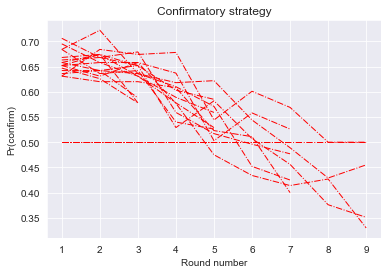

In [20]:
# PLOT THE DIFFERENCE TRENDS

def plot2d(title, x, y, xlabel, ylabel, colors=['red'], lw=[1], ls=['-.'], xaxis=[0,10], yaxis=[0,10], xtick=range(1,10), ytick=range(1,10)):
    for i in range(len(y)):
        plt.plot(x[i], y[i], linewidth=lw[0], color = colors[0], linestyle=ls[0])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    
plot2d('Confirmatory strategy', x_round, confirmatory_round, 'Round number', 'Pr(confirm)')

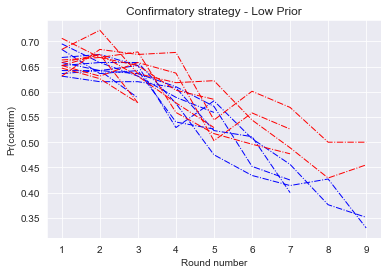

In [21]:
### SEPARATE THE TWO CONDITIONS (HIGH AND LOW PRIOR)

# DEFINE THE PLOT

def plot2d(title, x, y, xlabel, ylabel, colors=['red'], lw=[1], ls=['-.'], xaxis=[0,10], yaxis=[0,10], xtick=range(1,10), ytick=range(1,10)):
    for i in range(len(y)):
        plt.plot(x[i], y[i], linewidth=lw[0], color = colors[0], linestyle=ls[0])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

# HIGH PRIOR
target_prior = 0.1
target_color = 'blue'
y_round_target = []
x_round_target = []

for i_condition in range(25):
    i_prior   = table_condition[i_condition][0]
    if (i_prior == target_prior) or (i_prior == (1-target_prior)):
        x_round_target.append(x_round[i_condition])
        y_round_target.append(confirmatory_round[i_condition])

x_high = x_round_target
y_high = y_round_target
        
plot2d('Confirmatory strategy - High Prior', x_round_target, y_round_target, 'Round number', 'Pr(confirm)',target_color)

# LOW PRIOR
target_prior = 0.3
target_color = 'red'
y_round_target = []
x_round_target = []

for i_condition in range(25):
    i_prior   = table_condition[i_condition][0]
    if (i_prior == target_prior) or (i_prior == (1-target_prior)):
        x_round_target.append(x_round[i_condition])
        y_round_target.append(confirmatory_round[i_condition])

x_low = x_round_target
y_low = y_round_target

plot2d('Confirmatory strategy - Low Prior', x_round_target, y_round_target, 'Round number', 'Pr(confirm)',target_color)

In [22]:
# NOTES FOR TESTING...




[[1],
 [1, 2, 3],
 [1, 2, 3, 4, 5],
 [1, 2, 3, 4, 5, 6, 7],
 [1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1],
 [1, 2, 3],
 [1, 2, 3, 4, 5],
 [1, 2, 3, 4, 5, 6, 7],
 [1, 2, 3, 4, 5, 6, 7, 8, 9]]

[0.6571, 0.6465000000000001, 0.634875, 0.5755, 0.5393333333333333, 0.476, 0.42375, 0.40149999999999997, 0.3405]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[0.6577000000000001, 0.668375, 0.63575, 0.6121666666666666, 0.5499999999999999, 0.54975, 0.51525, 0.4645, 0.47750000000000004]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


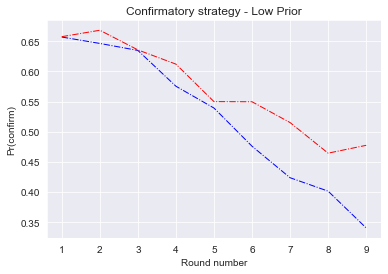

In [25]:
# CALCULATE AND PLOT THE AVERAGES FOR THE DIFFERENT CONDITIONS

target_color = 'blue'
x_round_target = x_high
y_round_target = y_high

val_matrix = [];
x_array = [];
for i_period in range(9):
    period = []
    for i_file in range(len(x_round_target)):
        if len(x_round_target[i_file])>i_period:
            period.append(y_round_target[i_file][i_period])
    
    mean_period = sum(period)/len(period)
    val_matrix.append(mean_period)
    x_array.append(i_period+1)

print(val_matrix)
print(x_array)
plot2d('Confirmatory strategy - High Prior', [x_array], [val_matrix], 'Round number', 'Pr(confirm)',target_color)


target_color = 'red'
x_round_target = x_low
y_round_target = y_low

val_matrix = [];
x_array = [];
for i_period in range(9):
    period = []
    for i_file in range(len(x_round_target)):
        if len(x_round_target[i_file])>i_period:
            period.append(y_round_target[i_file][i_period])
    
    mean_period = sum(period)/len(period)
    val_matrix.append(mean_period)
    x_array.append(i_period+1)

print(val_matrix)
print(x_array)

    
plot2d('Confirmatory strategy - Low Prior', [x_array], [val_matrix], 'Round number', 'Pr(confirm)',target_color)



In [47]:
# NOTES FOR TESTING...


t1_accuse_clean


t1_accuse_clean['posterior'].round(4)
list_unique = t1_accuse_clean['posterior'].unique()
list_unique = np.sort(list_unique)
list_unique = list_unique.tolist()
list_unique

t1_accuse_clean

df_posterior_average = t1_accuse_clean.groupby(['posterior'])['suspect'].mean()
df_posterior_average

posterior
0.403    0.473684
0.546    0.000000
0.681    0.666667
0.792    0.375000
0.871    0.111111
0.923    0.250000
0.955    0.000000
0.974    0.000000
0.985    0.000000
0.992    0.096774
Name: suspect, dtype: float64

In [ ]:
#### ACCUSE BEHAVIOR ###
# STORE the relevant information for every condition

In [92]:
accuse_statistic = [];
 
for i_condition in range(25):

    i_prior   = table_condition[i_condition][0]
    i_samples = table_condition[i_condition][1]
    
    ##### SUMMARY STATISTICS
    
    # select trials based on the condition, separate accuse and investigate
    temp      = db.loc[(db['red_prior_prob']==i_prior) & (db['rounds']==i_samples)]
    t1_accuse = temp.loc[temp['action_type'] == 1]
    t1_investigate    = temp.loc[temp['action_type'] == 0]
    # separate rounds with evidence found (certain) or not found (clean)
    t1_accuse_certain    = t1_accuse.loc[t1_accuse['evidence_found'] == 1]
    t1_accuse_clean      = t1_accuse.loc[t1_accuse['evidence_found'] == 0]
    t1_investigate_round1     = t1_investigate.loc[t1_investigate['current_rounds'] == 1]
    t1_investigate_clean = t1_investigate.loc[t1_investigate['evidence_found'] == 0]

    
    
    ########## FOCUS ONLY on t1_accuse_clean
    # calculate the prob(accuse 1) as a function of the posterior
    # vector of x (posteriors), vector of y (prob_accuse)
    t1_accuse_clean['posterior'] = t1_accuse_clean['posterior'].round(3)    
    list_unique = t1_accuse_clean['posterior'].unique()
    list_unique = np.sort(list_unique)
    list_unique = list_unique.tolist()
    list_unique

    df_posterior_average = t1_accuse_clean.groupby(['posterior'])['suspect'].mean().reset_index()
    accuse_statistic.append(df_posterior_average)    

accuse_statistic

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[   posterior   suspect
 0      0.077  0.939394
 1      0.129  0.917355,    posterior   suspect
 0      0.045  0.973684
 1      0.077  0.892857
 2      0.129  0.777778
 3      0.208  0.857143,    posterior   suspect
 0      0.026  0.966667
 1      0.045  1.000000
 2      0.077  0.823529
 3      0.129  0.900000
 4      0.208  0.777778
 5      0.319  0.846154,    posterior   suspect
 0      0.015  0.964286
 1      0.026  0.857143
 2      0.045  0.916667
 3      0.077  0.882353
 4      0.129  1.000000
 5      0.208  1.000000
 6      0.319  0.818182
 7      0.454  0.615385,    posterior   suspect
 0      0.008  0.958333
 1      0.015  1.000000
 2      0.026  0.875000
 3      0.045  0.909091
 4      0.077  0.800000
 5      0.129  0.846154
 6      0.208  0.333333
 7      0.319  0.500000
 8      0.454  0.250000
 9      0.597  0.636364,    posterior   suspect
 0      0.243  0.901639
 1      0.364  0.873016,    posterior   suspect
 0      0.153  0.882353
 1      0.243  0.821429
 2      0.364  0

---
[[0.429, 0.571], [0.297, 0.429, 0.571, 0.703], [0.192, 0.297, 0.429, 0.571, 0.703, 0.808], [0.118, 0.192, 0.297, 0.429, 0.571, 0.703, 0.808, 0.882], [0.07, 0.118, 0.192, 0.297, 0.429, 0.571, 0.703, 0.808, 0.882, 0.93]]
---
[[0.45454545454545453, 0.3977272727272727], [0.7307692307692307, 0.576271186440678, 0.4375, 0.325], [0.7142857142857143, 0.6666666666666666, 0.7272727272727273, 0.4666666666666667, 0.18181818181818182, 0.24], [0.8823529411764706, 1.0, 1.0, 0.5128205128205128, 0.36666666666666664, 0.09090909090909091, 0.0, 0.3684210526315789], [0.8, 1.0, 0.6666666666666666, 0.7, 0.625, 0.47619047619047616, 0.0, 0.0, 0.0, 0.0]]


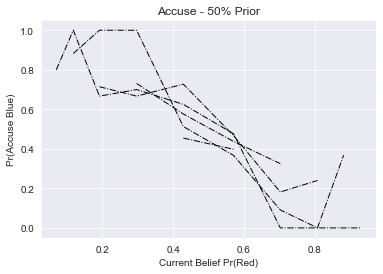

In [116]:
# HIGH PRIOR
target_prior = 0.5
target_color = 'k'
y_round_target = []
x_round_target = []

for i_condition in range(25):
    i_prior   = table_condition[i_condition][0]
    if (i_prior == target_prior):
        temp = accuse_statistic[i_condition]
        temp = temp.to_numpy()
        x_new=[]
        y_new=[]
        for i_posterior in range(len(temp)):
            x_new.append(temp[i_posterior][0])
            y_new.append(temp[i_posterior][1])
        
        x_round_target.append(x_new)
        y_round_target.append(y_new)

plot2d('Accuse - 50% Prior', x_round_target, y_round_target, 'Current Belief Pr(Red)', 'Pr(Accuse Blue)',target_color)


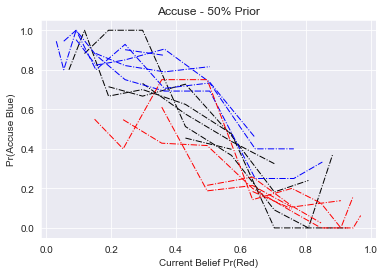

In [118]:
# NULL PRIOR
target_prior = 0.5
target_color = 'k'
y_round_target = []
x_round_target = []

for i_condition in range(25):
    i_prior   = table_condition[i_condition][0]
    if (i_prior == target_prior):
        temp = accuse_statistic[i_condition]
        temp = temp.to_numpy()
        x_new=[]
        y_new=[]
        for i_posterior in range(len(temp)):
            x_new.append(temp[i_posterior][0])
            y_new.append(temp[i_posterior][1])
        
        x_round_target.append(x_new)
        y_round_target.append(y_new)

plot2d('Accuse - 50% Prior', x_round_target, y_round_target, 'Current Belief Pr(Red)', 'Pr(Accuse Blue)',target_color)


# HIGH PRIOR
target_prior = 0.3
target_color = 'b'
y_round_target = []
x_round_target = []

for i_condition in range(25):
    i_prior   = table_condition[i_condition][0]
    if (i_prior == target_prior):
        temp = accuse_statistic[i_condition]
        temp = temp.to_numpy()
        x_new=[]
        y_new=[]
        for i_posterior in range(len(temp)):
            x_new.append(temp[i_posterior][0])
            y_new.append(temp[i_posterior][1])
        
        x_round_target.append(x_new)
        y_round_target.append(y_new)

plot2d('Accuse - 50% Prior', x_round_target, y_round_target, 'Current Belief Pr(Red)', 'Pr(Accuse Blue)',target_color)


# HIGH PRIOR
target_prior = 0.7
target_color = 'r'
y_round_target = []
x_round_target = []

for i_condition in range(25):
    i_prior   = table_condition[i_condition][0]
    if (i_prior == target_prior):
        temp = accuse_statistic[i_condition]
        temp = temp.to_numpy()
        x_new=[]
        y_new=[]
        for i_posterior in range(len(temp)):
            x_new.append(temp[i_posterior][0])
            y_new.append(temp[i_posterior][1])
        
        x_round_target.append(x_new)
        y_round_target.append(y_new)

plot2d('Accuse - 50% Prior', x_round_target, y_round_target, 'Current Belief Pr(Red)', 'Pr(Accuse Blue)',target_color)

